In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Load data

In [2]:
data = pd.read_csv(r'C:\Users\anget\OneDrive\Desktop\task\data.csv')

In [3]:
data.head()

,userid,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X19,X20,X21,X22,X23,X24,X25,X26,X27,target
0,92219,14,10,SMARTPHONE,M,27,0,173.500000,3.416172,25.0,...,173.500000,284,836,278.0,16426.0,0.0,15.0,1.0,4.0,593.46
1,92220,1,3,SMARTPHONE,M,35,0,6804.800018,3.596390,590.0,...,5806.750000,920,5495,948.0,46459.0,0.0,30.0,1.0,3.0,6277.15
2,92221,3,4,SMARTPHONE,M,38,41,453.899998,1.788130,60.5,...,174.849998,237,215,1250.0,3752.0,NaN,60.5,1.0,3.0,NaN
3,92222,21,3,DESKTOP,F,21,0,32.310000,1.239480,10.0,...,32.310000,32,76,78.0,1016.0,NaN,10.0,1.0,3.0,0.00
4,92223,1,10,SMARTPHONE,F,20,0,137.760003,1.876025,45.0,...,137.760003,55,157,888.0,12441.0,NaN,15.0,1.0,3.0,64.30


In [7]:
data.isnull().sum()

userid        0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22          63
X23          63
X24       40519
X25        1279
X26        1279
X27          26
target     8933
dtype: int64

# Too many missing values for the variable X24

In [8]:
data.describe()

,userid,X1,X2,X5,X6,X7,X8,X9,X10,X11,...,X19,X20,X21,X22,X23,X24,X25,X26,X27,target
count,107782.000000,107782.000000,107782.000000,107782.000000,107782.000000,1.077820e+05,107782.000000,107782.000000,107782.000000,107782.000000,...,1.077820e+05,107782.000000,107782.000000,107719.000000,107719.000000,67263.000000,106503.000000,106503.000000,107756.000000,9.884900e+04
mean,146109.500000,9.009677,4.087445,35.368652,23.186868,1.143330e+03,1.846975,99.069705,1.698472,77.465884,...,1.089219e+03,255.442272,713.083400,920.793221,10277.330991,5.395626,31.508584,1.024704,3.618926,4.712170e+03
std,31114.127694,6.589447,2.753266,12.101350,148.393365,1.003472e+04,1.216565,633.081473,1.234041,907.108504,...,9.979195e+03,533.421797,1708.865604,1086.434760,15009.334645,37.663611,172.417998,0.158986,1.102686,6.625051e+04
min,92219.000000,1.000000,0.000000,17.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,0.000000e+00
25%,119164.250000,3.000000,2.000000,26.000000,0.000000,4.010000e+01,0.999907,10.000000,0.999001,0.000000,...,3.148000e+01,25.000000,42.000000,332.000000,2433.000000,1.000000,10.000000,1.000000,3.000000,0.000000e+00
50%,146109.500000,5.000000,3.000000,32.000000,0.000000,1.255750e+02,1.228821,20.000000,0.999500,0.000000,...,1.021050e+02,78.000000,149.000000,599.000000,5158.000000,2.000000,10.000000,1.000000,3.000000,4.700000e+01
75%,173054.750000,14.000000,4.000000,43.000000,0.000000,4.871500e+02,2.270701,50.000000,1.999334,18.070000,...,4.305450e+02,242.000000,584.000000,1110.000000,11769.000000,4.000000,20.000000,1.000000,4.000000,8.854200e+02
max,200000.000000,21.000000,12.000000,98.000000,4375.000000,1.074833e+06,7.996935,79200.000000,7.997334,111220.000000,...,1.074833e+06,15920.000000,42836.000000,34277.000000,256227.000000,1885.000000,15000.000000,4.000000,6.000000,1.354362e+07


# Histograms of all the features

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


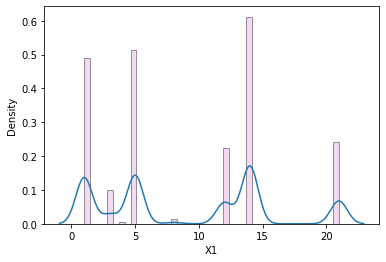

In [9]:
sns.distplot(data.iloc[:,1], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


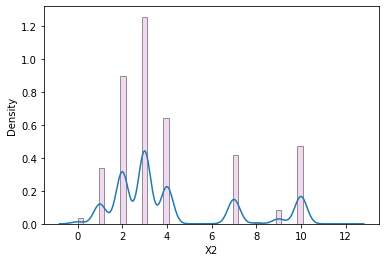

In [10]:
sns.distplot(data.iloc[:,2], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

<AxesSubplot:>

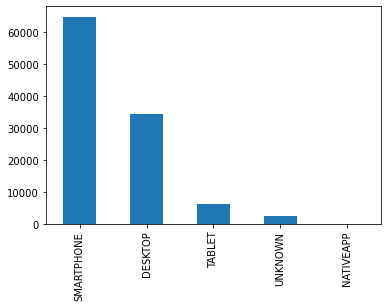

In [11]:
data['X3'].value_counts().plot(kind='bar')

<AxesSubplot:>

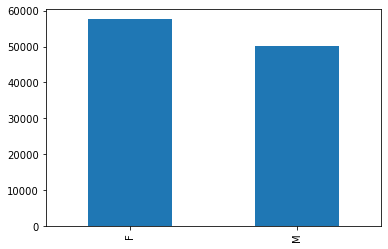

In [12]:
data['X4'].value_counts().plot(kind='bar')

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


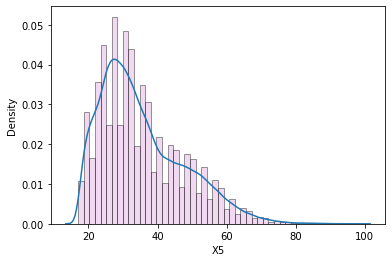

In [13]:
sns.distplot(data.iloc[:,5], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


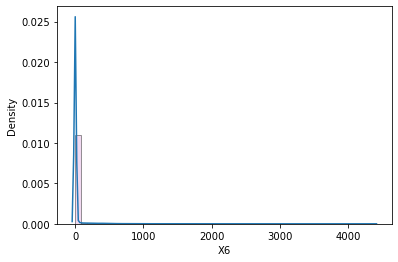

In [14]:
sns.distplot(data.iloc[:,6], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


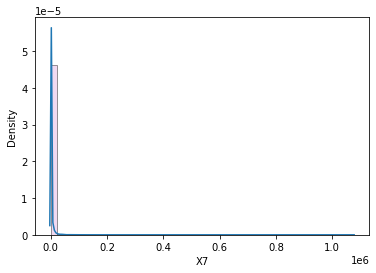

In [15]:
sns.distplot(data.iloc[:,7], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


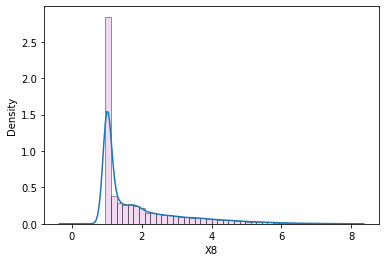

In [16]:
sns.distplot(data.iloc[:,8], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


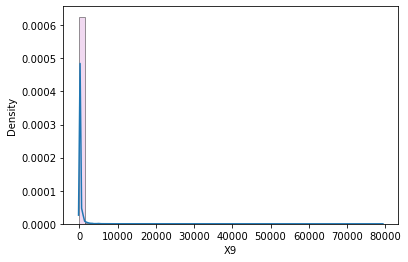

In [17]:
sns.distplot(data.iloc[:,9], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


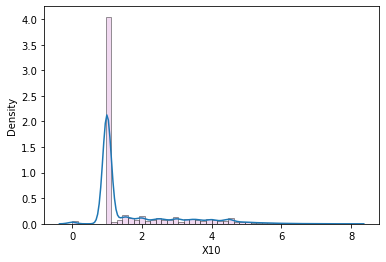

In [18]:
sns.distplot(data.iloc[:,10], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


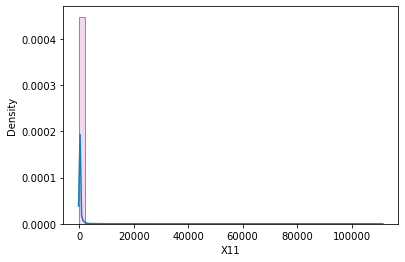

In [19]:
sns.distplot(data.iloc[:,11], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


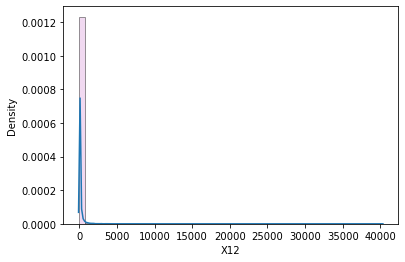

In [20]:
sns.distplot(data.iloc[:,12], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


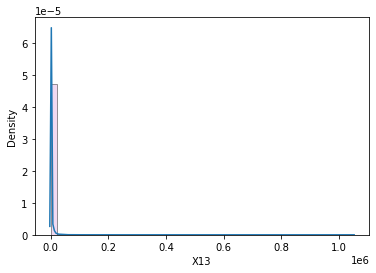

In [21]:
sns.distplot(data.iloc[:,13], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


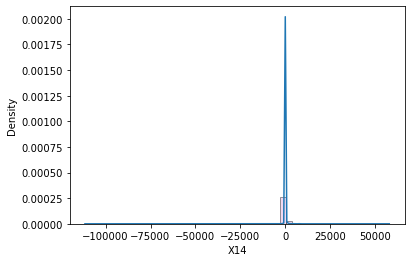

In [22]:
sns.distplot(data.iloc[:,14], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


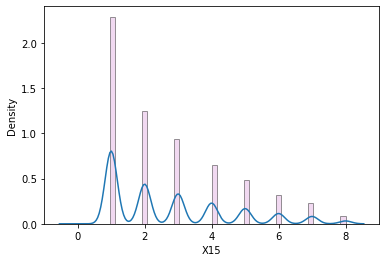

In [23]:
sns.distplot(data.iloc[:,15], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


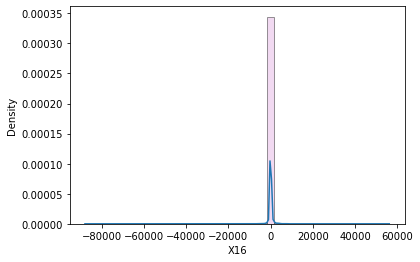

In [24]:
sns.distplot(data.iloc[:,16], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


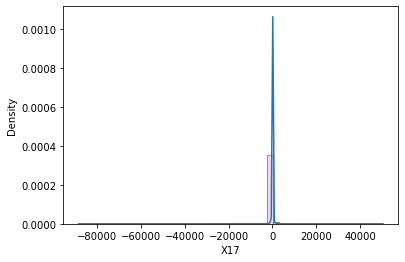

In [25]:
sns.distplot(data.iloc[:,17], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


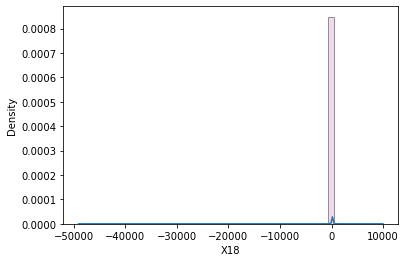

In [26]:
sns.distplot(data.iloc[:,18], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


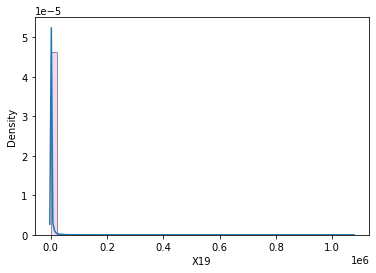

In [27]:
sns.distplot(data.iloc[:,19], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


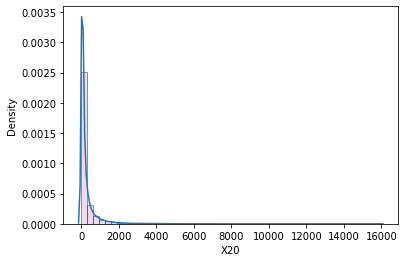

In [28]:
sns.distplot(data.iloc[:,20], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


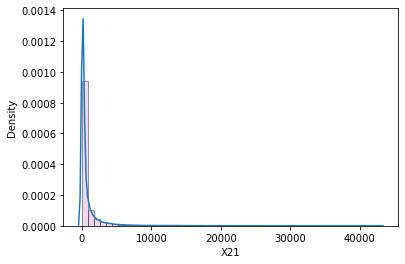

In [29]:
sns.distplot(data.iloc[:,21], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


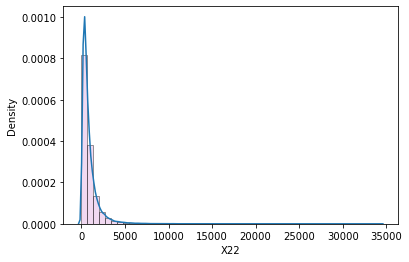

In [30]:
sns.distplot(data.iloc[:,22], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


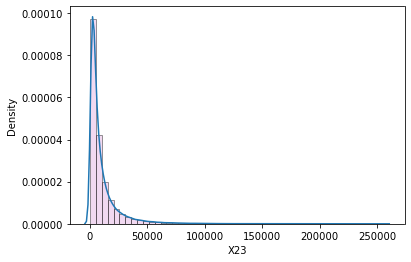

In [31]:
sns.distplot(data.iloc[:,23], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


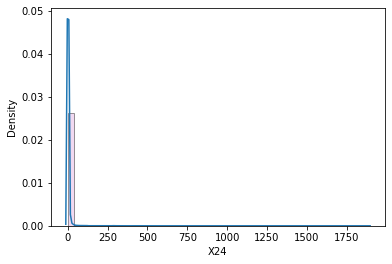

In [32]:
sns.distplot(data.iloc[:,24], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


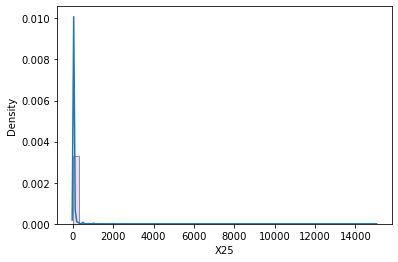

In [33]:
sns.distplot(data.iloc[:,25], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


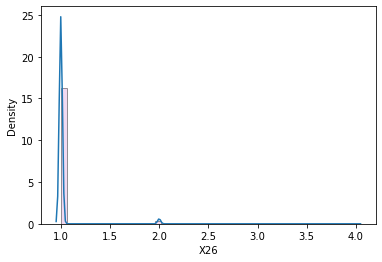

In [34]:
sns.distplot(data.iloc[:,26], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


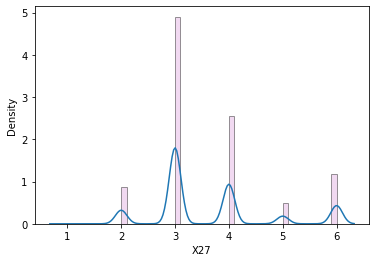

In [35]:
sns.distplot(data.iloc[:,27], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

C:\Users\anget\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


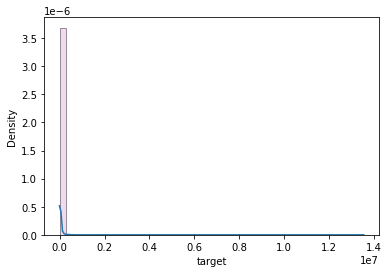

In [36]:
sns.distplot(data.iloc[:,28], hist_kws=dict(color='plum', edgecolor="k", linewidth=1))
plt.show()

# Up to this point we finished with the histograms of the features of the data

# Here we remove all the samples with missing values. In other words, we perform cleaning.

In [37]:
data = data.dropna()

In [38]:
data

,userid,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X19,X20,X21,X22,X23,X24,X25,X26,X27,target
0,92219,14,10,SMARTPHONE,M,27,0,173.500000,3.416172,25.0,...,173.500000,284,836,278.0,16426.0,0.0,15.0,1.0,4.0,593.460000
1,92220,1,3,SMARTPHONE,M,35,0,6804.800018,3.596390,590.0,...,5806.750000,920,5495,948.0,46459.0,0.0,30.0,1.0,3.0,6277.150000
5,92224,14,4,DESKTOP,M,47,4,42.000000,0.999762,10.0,...,17.610000,3,4,198.0,397.0,4.0,10.0,1.0,6.0,0.000000
7,92226,21,7,DESKTOP,M,31,12,99.010000,1.054736,10.0,...,99.010000,64,195,228.0,6162.0,1.0,10.0,2.0,4.0,468.549999
9,92228,12,2,SMARTPHONE,M,36,173,1233.460001,1.498829,60.0,...,1233.460001,107,1213,831.0,13310.0,1.0,20.0,1.0,3.0,289.349997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107775,199994,14,4,SMARTPHONE,M,33,0,20.000000,0.999500,10.0,...,20.000000,20,20,232.0,465.0,0.0,10.0,1.0,3.0,0.000000
107777,199996,12,2,SMARTPHONE,F,36,0,265.550001,2.472323,30.0,...,109.950000,188,145,343.0,4804.0,2.0,20.0,1.0,4.0,12396.709930
107779,199998,1,2,SMARTPHONE,M,34,0,25.800000,0.999613,20.0,...,25.800000,19,37,1082.0,3246.0,5.0,20.0,1.0,3.0,0.000000
107780,199999,14,3,SMARTPHONE,F,28,0,522.939995,2.009714,30.0,...,429.849994,68,403,2157.0,10785.0,1.0,20.0,1.0,3.0,42.150000


In [39]:
data = data.reset_index()

In [40]:
data.drop(columns = 'index')

,userid,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X19,X20,X21,X22,X23,X24,X25,X26,X27,target
0,92219,14,10,SMARTPHONE,M,27,0,173.500000,3.416172,25.0,...,173.500000,284,836,278.0,16426.0,0.0,15.0,1.0,4.0,593.460000
1,92220,1,3,SMARTPHONE,M,35,0,6804.800018,3.596390,590.0,...,5806.750000,920,5495,948.0,46459.0,0.0,30.0,1.0,3.0,6277.150000
2,92224,14,4,DESKTOP,M,47,4,42.000000,0.999762,10.0,...,17.610000,3,4,198.0,397.0,4.0,10.0,1.0,6.0,0.000000
3,92226,21,7,DESKTOP,M,31,12,99.010000,1.054736,10.0,...,99.010000,64,195,228.0,6162.0,1.0,10.0,2.0,4.0,468.549999
4,92228,12,2,SMARTPHONE,M,36,173,1233.460001,1.498829,60.0,...,1233.460001,107,1213,831.0,13310.0,1.0,20.0,1.0,3.0,289.349997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60780,199994,14,4,SMARTPHONE,M,33,0,20.000000,0.999500,10.0,...,20.000000,20,20,232.0,465.0,0.0,10.0,1.0,3.0,0.000000
60781,199996,12,2,SMARTPHONE,F,36,0,265.550001,2.472323,30.0,...,109.950000,188,145,343.0,4804.0,2.0,20.0,1.0,4.0,12396.709930
60782,199998,1,2,SMARTPHONE,M,34,0,25.800000,0.999613,20.0,...,25.800000,19,37,1082.0,3246.0,5.0,20.0,1.0,3.0,0.000000
60783,199999,14,3,SMARTPHONE,F,28,0,522.939995,2.009714,30.0,...,429.849994,68,403,2157.0,10785.0,1.0,20.0,1.0,3.0,42.150000


In [41]:
one_hot_encoding_of_gender = pd.get_dummies(data['X4'])

In [42]:
one_hot_encoding_of_gender

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
60780,0,1
60781,1,0
60782,0,1
60783,1,0


In [43]:
data = pd.concat([data,one_hot_encoding_of_gender],axis=1)

In [44]:
data

,index,userid,X1,X2,X3,X4,X5,X6,X7,X8,...,X21,X22,X23,X24,X25,X26,X27,target,F,M
0,0,92219,14,10,SMARTPHONE,M,27,0,173.500000,3.416172,...,836,278.0,16426.0,0.0,15.0,1.0,4.0,593.460000,0,1
1,1,92220,1,3,SMARTPHONE,M,35,0,6804.800018,3.596390,...,5495,948.0,46459.0,0.0,30.0,1.0,3.0,6277.150000,0,1
2,5,92224,14,4,DESKTOP,M,47,4,42.000000,0.999762,...,4,198.0,397.0,4.0,10.0,1.0,6.0,0.000000,0,1
3,7,92226,21,7,DESKTOP,M,31,12,99.010000,1.054736,...,195,228.0,6162.0,1.0,10.0,2.0,4.0,468.549999,0,1
4,9,92228,12,2,SMARTPHONE,M,36,173,1233.460001,1.498829,...,1213,831.0,13310.0,1.0,20.0,1.0,3.0,289.349997,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60780,107775,199994,14,4,SMARTPHONE,M,33,0,20.000000,0.999500,...,20,232.0,465.0,0.0,10.0,1.0,3.0,0.000000,0,1
60781,107777,199996,12,2,SMARTPHONE,F,36,0,265.550001,2.472323,...,145,343.0,4804.0,2.0,20.0,1.0,4.0,12396.709930,1,0
60782,107779,199998,1,2,SMARTPHONE,M,34,0,25.800000,0.999613,...,37,1082.0,3246.0,5.0,20.0,1.0,3.0,0.000000,0,1
60783,107780,199999,14,3,SMARTPHONE,F,28,0,522.939995,2.009714,...,403,2157.0,10785.0,1.0,20.0,1.0,3.0,42.150000,1,0


In [45]:
one_hot_encoding_of_gender

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
60780,0,1
60781,1,0
60782,0,1
60783,1,0


In [46]:
one_hot_encoding_of_device = pd.get_dummies(data['X3'])

In [47]:
one_hot_encoding_of_device

,DESKTOP,NATIVEAPP,SMARTPHONE,TABLET,UNKNOWN
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
60780,0,0,1,0,0
60781,0,0,1,0,0
60782,0,0,1,0,0
60783,0,0,1,0,0


# Here we substitute the device variable X3 with 5 new variables with one hot encoding

# Here we substitute the gender variable X4 with 2 new one hot encoding

In [48]:
data = pd.concat([data, one_hot_encoding_of_device], axis=1)

In [49]:
data = data.drop(columns = ['index','X3','X4'])

In [50]:
data = data.drop(columns = 'userid')

# Here we drop the userid variable because it is redundant for our analysis

In [51]:
data

,X1,X2,X5,X6,X7,X8,X9,X10,X11,X12,...,X26,X27,target,F,M,DESKTOP,NATIVEAPP,SMARTPHONE,TABLET,UNKNOWN
0,14,10,27,0,173.500000,3.416172,25.0,1.599360,85.000000,9.362779,...,1.0,4.0,593.460000,0,1,0,0,1,0,0
1,1,3,35,0,6804.800018,3.596390,590.0,4.135523,300.250000,335.902631,...,1.0,3.0,6277.150000,0,1,0,0,1,0,0
2,14,4,47,4,42.000000,0.999762,10.0,0.999001,37.869999,0.567000,...,1.0,6.0,0.000000,0,1,1,0,0,0,0
3,21,7,31,12,99.010000,1.054736,10.0,0.999001,65.000000,4.242394,...,2.0,4.0,468.549999,0,1,1,0,0,0,0
4,12,2,36,173,1233.460001,1.498829,60.0,3.832695,0.000000,57.623514,...,1.0,3.0,289.349997,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60780,14,4,33,0,20.000000,0.999500,10.0,0.999001,0.000000,1.692000,...,1.0,3.0,0.000000,0,1,0,0,1,0,0
60781,12,2,36,0,265.550001,2.472323,30.0,2.999000,0.000000,10.546365,...,1.0,4.0,12396.709930,1,0,0,0,1,0,0
60782,1,2,34,0,25.800000,0.999613,20.0,0.999500,0.000000,1.230000,...,1.0,3.0,0.000000,0,1,0,0,1,0,0
60783,14,3,28,0,522.939995,2.009714,30.0,1.666111,0.000000,19.221675,...,1.0,3.0,42.150000,1,0,0,0,1,0,0


In [52]:
x_data = data

In [53]:
y_data = x_data['target']

In [54]:
x_data = x_data.drop(columns=['target'])

# Split the dataset into train and test set. The train set will be used as a crossvalidation set.

In [55]:
X_train , X_test, y_train, y_test = train_test_split(x_data, y_data , test_size=0.15, random_state=42)

In [56]:
X_test.shape

(9118, 32)

# X_train, X_test, y_train, y_test, data in the format with all the features

In [57]:
data_train = pd.concat([X_train, y_train],axis=1)

In [58]:
data_train

,X1,X2,X5,X6,X7,X8,X9,X10,X11,X12,...,X26,X27,F,M,DESKTOP,NATIVEAPP,SMARTPHONE,TABLET,UNKNOWN,target
45768,14,1,43,0,108.000000,3.462642,20.0,4.497751,10.12,2.663020,...,1.0,6.0,1,0,1,0,0,0,0,760.600000
52376,14,3,26,176,247.549999,2.646227,70.0,3.428082,0.00,10.151580,...,1.0,5.0,1,0,0,0,1,0,0,4107.600002
49739,5,2,24,0,10.200000,0.999021,10.0,0.999001,0.00,0.626700,...,1.0,3.0,1,0,0,0,1,0,0,0.000000
47688,5,3,30,0,11.700000,1.238258,10.0,0.999001,200.00,1.907340,...,1.0,2.0,1,0,0,0,1,0,0,2.850000
35769,1,4,28,0,12.000000,0.999167,10.0,0.999001,0.00,0.526600,...,1.0,3.0,0,1,0,0,1,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,14,2,34,0,4037.930012,2.525194,572.0,2.353106,230.00,227.743279,...,1.0,4.0,0,1,0,0,1,0,0,2456.449998
38158,14,7,24,0,44.110000,1.748640,10.0,0.999001,0.00,2.327615,...,1.0,3.0,1,0,0,0,1,0,0,0.000000
860,5,1,46,0,142.900001,0.999930,10.0,0.999001,0.00,19.275630,...,1.0,2.0,1,0,1,0,0,0,0,0.000000
15795,5,3,23,0,14.300000,0.999301,10.0,0.999001,0.00,1.569150,...,1.0,2.0,1,0,0,0,1,0,0,0.000000


In [59]:
y_train

45768     760.600000
52376    4107.600002
49739       0.000000
47688       2.850000
35769       0.000000
            ...     
54343    2456.449998
38158       0.000000
860         0.000000
15795       0.000000
56422       0.000000
Name: target, Length: 51667, dtype: float64

# Here is the point where I observe several zero targets

In [60]:
np.median(y_train)

84.40000032

In [61]:
y_train.nunique()

33308

In [62]:
y_train_with_reset_index = y_train.reset_index()

In [63]:
y_train_with_reset_index = y_train_with_reset_index.drop(columns=['index'])

In [64]:
y_train_with_reset_index = y_train_with_reset_index.to_numpy()

In [65]:
zero_counter = 0
for i in range(0,len(y_train_with_reset_index)):
    if y_train_with_reset_index[i] == 0.000000:
        zero_counter +=1

In [66]:
zero_counter

14156

In [67]:
y_train

45768     760.600000
52376    4107.600002
49739       0.000000
47688       2.850000
35769       0.000000
            ...     
54343    2456.449998
38158       0.000000
860         0.000000
15795       0.000000
56422       0.000000
Name: target, Length: 51667, dtype: float64

# Several targets are equal to 0

# Now we apply pearson correlation. We want to see at first which variables have the most linear relationship with the target variable. This latter statement is assumption of linear regression. Other than that, the linear regression has the assumption that each independent variable should not has high collinearity with the others.

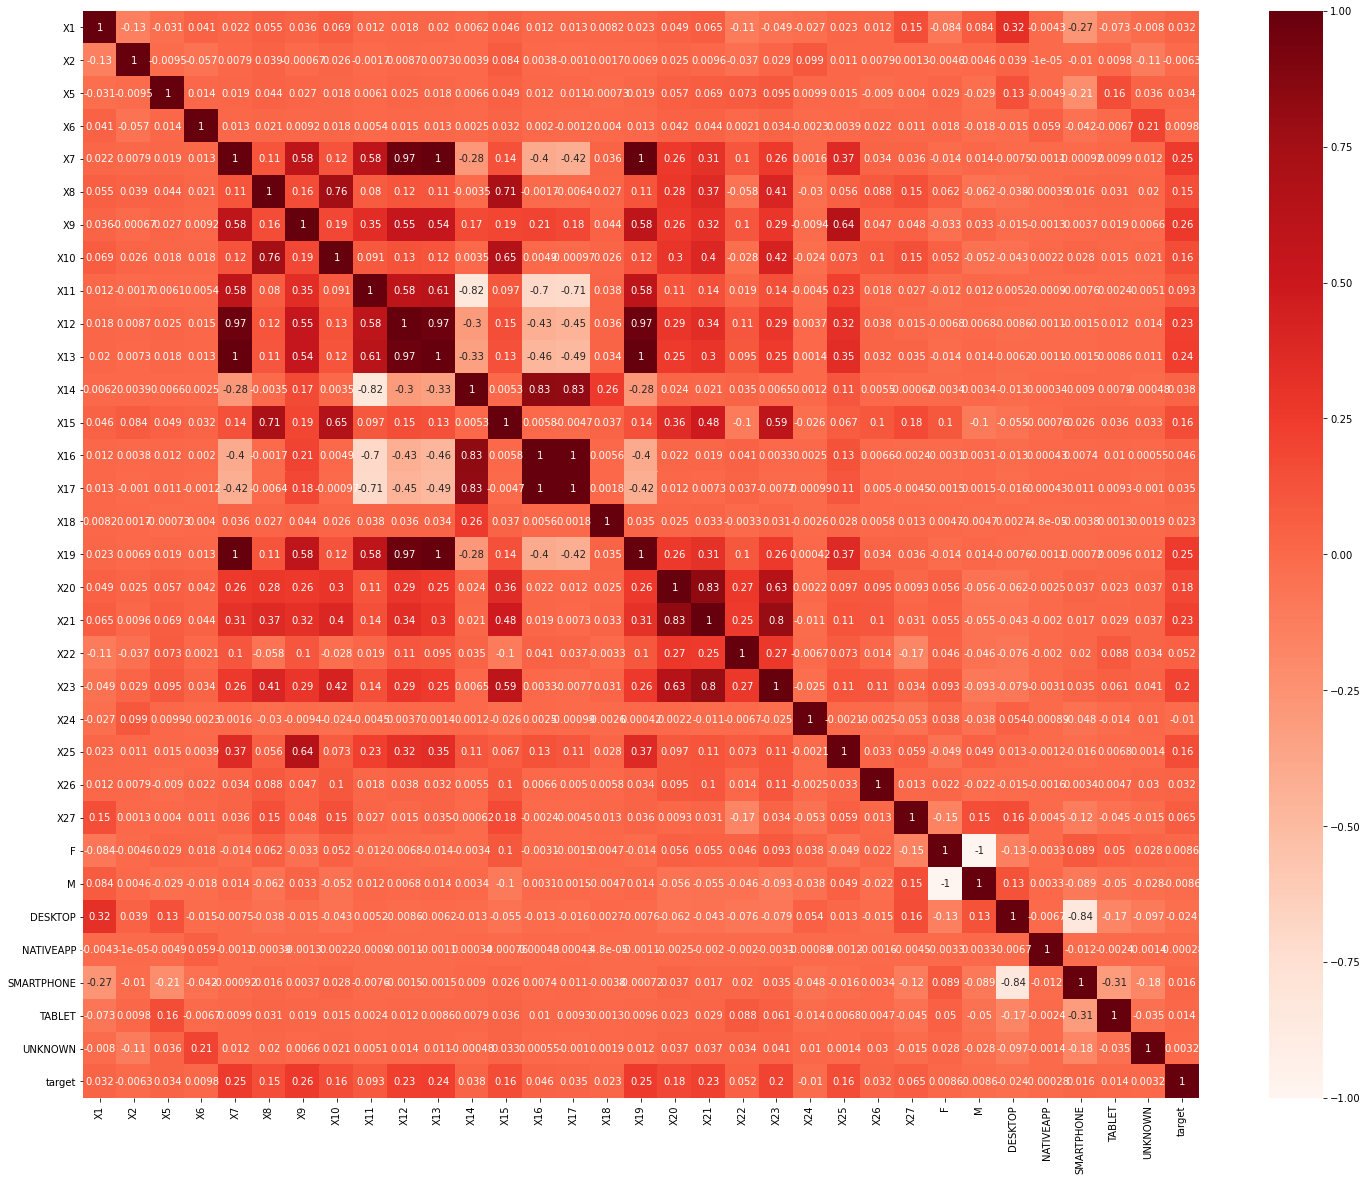

In [68]:
plt.figure(figsize=(25,20))
cor = data_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [69]:
cor_target = abs(cor["target"])
relevant_features = cor_target[cor_target>0.15]
relevant_features

X7        0.251534
X9        0.258079
X10       0.163070
X12       0.233018
X13       0.238657
X15       0.159703
X19       0.250884
X20       0.181878
X21       0.225628
X23       0.204903
X25       0.160861
target    1.000000
Name: target, dtype: float64

# We can observe that the variable that are mostly correlated with the dependent variable target are the X7, X9, X10, X12, X13, X15, X19, X20, X21, X23 and X25

# Linear Regression's assumption is that the independent variables need to be uncorrelated with each other

# The variable X7 has correlation 0.58 with the variable X9, has correlation 0.12 with the variable X10, has correlation 0.97 with the variable X12, has correlation 1 with the variable X13, has correlation 0.14 with the variable X15, has correlation 1 with the variable X19, has correlation 0.26 with the variable X20, has correlation 0.31 with the variable X21 and has correlation 0.26 with the variable X23 and has correlation 0.37 with the variable X25. Since there are variable that has high correlation with the variable X7, we can remove the X7.

# The variable X9 has correlation 0.19 with the variable X10, has correlation 0.55 with the variable X12, has correlation 0.54 with the variable X13, has correlation 0.19 with the variable X15, has correlation 0.58 with the variable X19, has correlation 0.26 with the variable X20 has correlation 0.32 with the variable X21, has correlation 0.29 with the variable X23 and has correlation 0.64 with the variable X25. Since there are variable that has high correlation with the variable X9, we can remove the X9.

# The variable X10 has correlation 0.13 with the variable X12, has correlation 0.12 with the variable X13, has correlation 0.65 with the variable X15, has correlation 0.12 with the variable X19, has correlation 0.3 with the variable X20 has correlation 0.34 with the variable X21, has correlation 0.29 with the variable X23 and has correlation 0.32 with the variable X25. Since there are variable that has high correlation with the variable X10, we can remove the X10

# The variable X12 has correlation 0.97 with the variable X13, has correlation 0.15 with the variable X15, has correlation 0.97 with the variable X19, has correlation 0.29 with the variable X20 has correlation 0.34 with the variable X21, has correlation 0.29 with the variable X23 and has correlation 0.32 with the variable X25. Since there are variable that has high correlation with the variable X12, we can remove the X12

# The variable X13 has correlation 0.13 with the variable X15, has correlation 1 with the variable X19, has correlation 0.25 with the variable X20 has correlation 0.3 with the variable X21, has correlation 0.25 with the variable X23 and has correlation 0.35 with the variable X25. Since there is a variable that has high correlation with the variable X13, we can remove the X13.

# The variable X15 has correlation 0.14 with the variable X19, has correlation 0.36 with the variable X20, has correlation 0.48 with the variable X21, has correlation 0.59 with the variable X23 and has correlation 0.067 with the variable X25. Since there is a variable that has high correlation with the variable X23, we can remove the X15.

# The variable X19 has correlation 0.26 with the variable X20, has correlation 0.31 with the variable X21, has correlation 0.26 with the variable X23 and has correlation 0.37 with the variable X25. Since there are not variables that have high correlation with the variable X19, we keep the X19.

# The variable X20 has correlation 0.83 with the variable X21, has correlation 0.63 with the variable X23 and has correlation 0.097 with the variable X25. Since there are variables that have high correlation with the variable X20, we remove the X20.

# The variable X21 has correlation 0.8 with the variable X23 and 0.11 with the variable X25. Therefore we can remove the variable X21. 

# The variable X23 has correlation with the variable X25 0.11. Therefore we keep both variables X23 and X25.

# By removing the variable X15 we can keep the variable X10, because the maximum correlation on the X10 is the X15. In other words, I keep the X10 variable.

In [70]:
data_for_pairplot = data.drop(columns=['X1','X2','X5','X6','X7','X8','X9','X11','X12','X13','X14','X15','X16','X17','X18','X20','X21','X22','X24','X26','X27'])

In [71]:
data_for_pairplot

,X10,X19,X23,X25,target,F,M,DESKTOP,NATIVEAPP,SMARTPHONE,TABLET,UNKNOWN
0,1.599360,173.500000,16426.0,15.0,593.460000,0,1,0,0,1,0,0
1,4.135523,5806.750000,46459.0,30.0,6277.150000,0,1,0,0,1,0,0
2,0.999001,17.610000,397.0,10.0,0.000000,0,1,1,0,0,0,0
3,0.999001,99.010000,6162.0,10.0,468.549999,0,1,1,0,0,0,0
4,3.832695,1233.460001,13310.0,20.0,289.349997,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60780,0.999001,20.000000,465.0,10.0,0.000000,0,1,0,0,1,0,0
60781,2.999000,109.950000,4804.0,20.0,12396.709930,1,0,0,0,1,0,0
60782,0.999500,25.800000,3246.0,20.0,0.000000,0,1,0,0,1,0,0
60783,1.666111,429.849994,10785.0,20.0,42.150000,1,0,0,0,1,0,0


In [72]:
data_for_pairplot2 = data_for_pairplot.drop(columns=['F','M', 'DESKTOP', 'NATIVEAPP', 'SMARTPHONE', 'TABLET', 'UNKNOWN'])

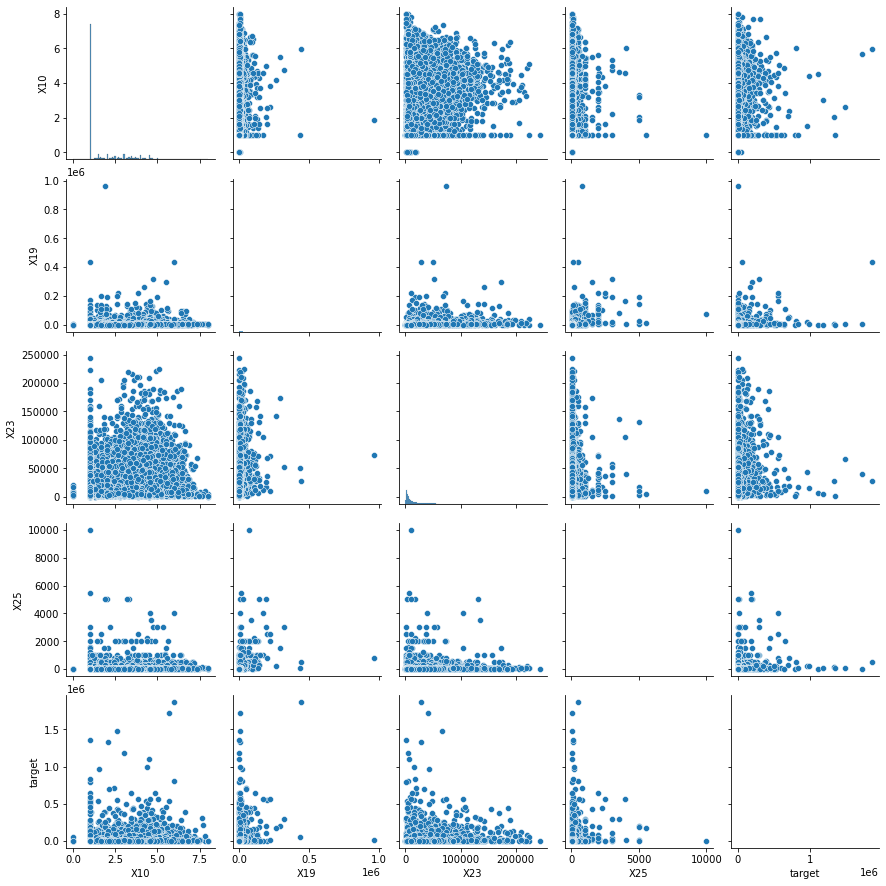

In [73]:
sns.pairplot(data_for_pairplot2)

In [75]:
X_train

,X1,X2,X5,X6,X7,X8,X9,X10,X11,X12,...,X25,X26,X27,F,M,DESKTOP,NATIVEAPP,SMARTPHONE,TABLET,UNKNOWN
45768,14,1,43,0,108.000000,3.462642,20.0,4.497751,10.12,2.663020,...,10.0,1.0,6.0,1,0,1,0,0,0,0
52376,14,3,26,176,247.549999,2.646227,70.0,3.428082,0.00,10.151580,...,20.0,1.0,5.0,1,0,0,0,1,0,0
49739,5,2,24,0,10.200000,0.999021,10.0,0.999001,0.00,0.626700,...,10.0,1.0,3.0,1,0,0,0,1,0,0
47688,5,3,30,0,11.700000,1.238258,10.0,0.999001,200.00,1.907340,...,10.0,1.0,2.0,1,0,0,0,1,0,0
35769,1,4,28,0,12.000000,0.999167,10.0,0.999001,0.00,0.526600,...,10.0,1.0,3.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,14,2,34,0,4037.930012,2.525194,572.0,2.353106,230.00,227.743279,...,25.0,1.0,4.0,0,1,0,0,1,0,0
38158,14,7,24,0,44.110000,1.748640,10.0,0.999001,0.00,2.327615,...,10.0,1.0,3.0,1,0,0,0,1,0,0
860,5,1,46,0,142.900001,0.999930,10.0,0.999001,0.00,19.275630,...,10.0,1.0,2.0,1,0,1,0,0,0,0
15795,5,3,23,0,14.300000,0.999301,10.0,0.999001,0.00,1.569150,...,10.0,1.0,2.0,1,0,0,0,1,0,0


# Here we create a new version of the dataset, where we keep the 15 most important features.

In [76]:
fs = SelectKBest(score_func=f_regression, k=15)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# For our modelling and testing part, we use 3 versions of the data
# 1) We keep all the features
# 2) We keep the categorical variables and the variables that has the most correlation with the target and the least collinearity with each other
# 3) We pick the 15 best features

# Explanation of model selection. CV set and hold out set. We use crossvalitation set to pick the best algorithms(models with different hyperparameters). Finally we identify the best algorithms and we check their generalization performance on the hold-out/test set.

# Modelling part

# Modelling part with all the features

In [77]:
X_train

,X1,X2,X5,X6,X7,X8,X9,X10,X11,X12,...,X25,X26,X27,F,M,DESKTOP,NATIVEAPP,SMARTPHONE,TABLET,UNKNOWN
45768,14,1,43,0,108.000000,3.462642,20.0,4.497751,10.12,2.663020,...,10.0,1.0,6.0,1,0,1,0,0,0,0
52376,14,3,26,176,247.549999,2.646227,70.0,3.428082,0.00,10.151580,...,20.0,1.0,5.0,1,0,0,0,1,0,0
49739,5,2,24,0,10.200000,0.999021,10.0,0.999001,0.00,0.626700,...,10.0,1.0,3.0,1,0,0,0,1,0,0
47688,5,3,30,0,11.700000,1.238258,10.0,0.999001,200.00,1.907340,...,10.0,1.0,2.0,1,0,0,0,1,0,0
35769,1,4,28,0,12.000000,0.999167,10.0,0.999001,0.00,0.526600,...,10.0,1.0,3.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,14,2,34,0,4037.930012,2.525194,572.0,2.353106,230.00,227.743279,...,25.0,1.0,4.0,0,1,0,0,1,0,0
38158,14,7,24,0,44.110000,1.748640,10.0,0.999001,0.00,2.327615,...,10.0,1.0,3.0,1,0,0,0,1,0,0
860,5,1,46,0,142.900001,0.999930,10.0,0.999001,0.00,19.275630,...,10.0,1.0,2.0,1,0,1,0,0,0,0
15795,5,3,23,0,14.300000,0.999301,10.0,0.999001,0.00,1.569150,...,10.0,1.0,2.0,1,0,0,0,1,0,0


In [78]:
from sklearn.model_selection import StratifiedShuffleSplit
folds = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
folds.get_n_splits(X_train, y_train)
from sklearn.metrics import mean_squared_error

In [79]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [80]:
from sklearn.model_selection import KFold
scores = []
model = Ridge(alpha=1.0)
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_test_cv = scaler.transform(X_test_cv)
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    model.fit(X_train_cv,y_train_cv)
    y_pred_valid = model.predict(X_test_cv)
    metric_score = mean_squared_error(y_test_cv, y_pred_valid, squared=False)
    scores.append(metric_score)
print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 26111.5381, std: 3281.6631.


In [81]:
from sklearn.model_selection import KFold
scores = []
model = Lasso(alpha=1.0)
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_test_cv = scaler.transform(X_test_cv)
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    model.fit(X_train_cv,y_train_cv)
    y_pred_valid = model.predict(X_test_cv)
    metric_score = mean_squared_error(y_test_cv, y_pred_valid, squared=False)
    scores.append(metric_score)
print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]


C:\Users\anget\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+13, tolerance: 3.472e+09
  model = cd_fast.enet_coordinate_descent(


TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]


C:\Users\anget\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.704e+12, tolerance: 3.186e+09
  model = cd_fast.enet_coordinate_descent(


TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]


C:\Users\anget\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.039e+12, tolerance: 3.091e+09
  model = cd_fast.enet_coordinate_descent(


TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]


C:\Users\anget\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.954e+12, tolerance: 2.868e+09
  model = cd_fast.enet_coordinate_descent(


TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 26219.2540, std: 3132.9522.


C:\Users\anget\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.208e+12, tolerance: 3.097e+09
  model = cd_fast.enet_coordinate_descent(


In [82]:
from sklearn.model_selection import KFold
scores = []
model = ElasticNet(random_state=0)
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_test_cv = scaler.transform(X_test_cv)
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    model.fit(X_train_cv,y_train_cv)
    y_pred_valid = model.predict(X_test_cv)
    metric_score = mean_squared_error(y_test_cv, y_pred_valid, squared=False)
    scores.append(metric_score)
print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 26266.4938, std: 3146.3611.


In [83]:
from sklearn.model_selection import KFold
scores = []
model = xgb.XGBRegressor()
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_test_cv = scaler.transform(X_test_cv)
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
    model.fit(X_train_cv,y_train_cv)
    y_pred_valid = model.predict(X_test_cv)
    metric_score = mean_squared_error(y_test_cv, y_pred_valid, squared=False)
    scores.append(metric_score)
print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 27378.2096, std: 3226.7082.


In [85]:
list_with_lr = [1, 0.5, 0.1 , 0.01, 0.001]

for lr in list_with_lr:
    scores = []
    model = xgb.XGBRegressor(eta=lr)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X_train)
    KFold(n_splits=5, random_state=None, shuffle=False)
    for train_index, test_index in kf.split(X_train):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        scaler = StandardScaler()
        X_train_cv = scaler.fit_transform(X_train_cv)
        X_test_cv = scaler.transform(X_test_cv)
        y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
        model.fit(X_train_cv,y_train_cv)
        y_pred_valid = model.predict(X_test_cv)
        metric_score = mean_squared_error(y_test_cv, y_pred_valid, squared=False)
        scores.append(metric_score)
    print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 31244.8149, std: 2416.4778.
TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 

# Here we finished the modelling on the part where we take into account all the features

# Modelling on the dataset where we use the features that has the most linear relationship with the target variable and these features has the less collinearity with each other

In [86]:
data_for_pairplot2

,X10,X19,X23,X25,target
0,1.599360,173.500000,16426.0,15.0,593.460000
1,4.135523,5806.750000,46459.0,30.0,6277.150000
2,0.999001,17.610000,397.0,10.0,0.000000
3,0.999001,99.010000,6162.0,10.0,468.549999
4,3.832695,1233.460001,13310.0,20.0,289.349997
...,...,...,...,...,...
60780,0.999001,20.000000,465.0,10.0,0.000000
60781,2.999000,109.950000,4804.0,20.0,12396.709930
60782,0.999500,25.800000,3246.0,20.0,0.000000
60783,1.666111,429.849994,10785.0,20.0,42.150000


In [87]:
data_for_pairplot

,X10,X19,X23,X25,target,F,M,DESKTOP,NATIVEAPP,SMARTPHONE,TABLET,UNKNOWN
0,1.599360,173.500000,16426.0,15.0,593.460000,0,1,0,0,1,0,0
1,4.135523,5806.750000,46459.0,30.0,6277.150000,0,1,0,0,1,0,0
2,0.999001,17.610000,397.0,10.0,0.000000,0,1,1,0,0,0,0
3,0.999001,99.010000,6162.0,10.0,468.549999,0,1,1,0,0,0,0
4,3.832695,1233.460001,13310.0,20.0,289.349997,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60780,0.999001,20.000000,465.0,10.0,0.000000,0,1,0,0,1,0,0
60781,2.999000,109.950000,4804.0,20.0,12396.709930,1,0,0,0,1,0,0
60782,0.999500,25.800000,3246.0,20.0,0.000000,0,1,0,0,1,0,0
60783,1.666111,429.849994,10785.0,20.0,42.150000,1,0,0,0,1,0,0


In [88]:
X_train_corr = data_for_pairplot.drop(columns=['target'])
y_train_corr = data_for_pairplot['target']

In [91]:
X_train_corr = X_train_corr.to_numpy()
y_train_corr = y_train_corr.to_numpy()

In [92]:
X_train_corr , X_test_corr, y_train_corr, y_test_corr = train_test_split(X_train_corr, y_train_corr , test_size=0.15, random_state=42)
folds = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
folds.get_n_splits(X_train_corr, y_train_corr)

5

In [93]:
from sklearn.model_selection import KFold
scores = []
model = Ridge(alpha=1.0)
kf = KFold(n_splits=5)
kf.get_n_splits(X_train_corr)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_train_corr):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv_corr, X_test_cv_corr = X_train_corr[train_index], X_train_corr[test_index]
    scaler = StandardScaler()
    X_train_cv_corr = scaler.fit_transform(X_train_cv_corr)
    X_test_cv_corr = scaler.transform(X_test_cv_corr)
    y_train_cv_corr, y_test_cv_corr = y_train_corr[train_index], y_train_corr[test_index]
    model.fit(X_train_cv_corr,y_train_cv_corr)
    y_pred_valid_corr = model.predict(X_test_cv_corr)
    metric_score = mean_squared_error(y_test_cv_corr, y_pred_valid_corr, squared=False)
    scores.append(metric_score)
print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 26044.3282, std: 3580.4633.


In [94]:
from sklearn.model_selection import KFold
scores = []
model = Lasso(alpha=1.0)
kf = KFold(n_splits=5)
kf.get_n_splits(X_train_corr)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_train_corr):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv_corr, X_test_cv_corr = X_train_corr[train_index], X_train_corr[test_index]
    scaler = StandardScaler()
    X_train_cv_corr = scaler.fit_transform(X_train_cv_corr)
    X_test_cv_corr = scaler.transform(X_test_cv_corr)
    y_train_cv_corr, y_test_cv_corr = y_train_corr[train_index], y_train_corr[test_index]
    model.fit(X_train_cv_corr,y_train_cv_corr)
    y_pred_valid_corr = model.predict(X_test_cv_corr)
    metric_score = mean_squared_error(y_test_cv_corr, y_pred_valid_corr, squared=False)
    scores.append(metric_score)
print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 26044.3021, std: 3580.4582.


In [95]:
from sklearn.model_selection import KFold
scores = []
model = ElasticNet(random_state=0)
kf = KFold(n_splits=5)
kf.get_n_splits(X_train_corr)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_train_corr):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv_corr, X_test_cv_corr = X_train_corr[train_index], X_train_corr[test_index]
    scaler = StandardScaler()
    X_train_cv_corr = scaler.fit_transform(X_train_cv_corr)
    X_test_cv_corr = scaler.transform(X_test_cv_corr)
    y_train_cv_corr, y_test_cv_corr = y_train_corr[train_index], y_train_corr[test_index]
    model.fit(X_train_cv_corr,y_train_cv_corr)
    y_pred_valid_corr = model.predict(X_test_cv_corr)
    metric_score = mean_squared_error(y_test_cv_corr, y_pred_valid_corr, squared=False)
    scores.append(metric_score)
print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 26077.2449, std: 3586.7362.


In [96]:
list_with_lr = [1, 0.5, 0.1 , 0.01, 0.001]

for lr in list_with_lr:
    scores = []
    model = xgb.XGBRegressor(eta=lr)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X_train_corr)
    KFold(n_splits=5, random_state=None, shuffle=False)
    for train_index, test_index in kf.split(X_train_corr):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train_cv_corr, X_test_cv_corr = X_train_corr[train_index], X_train_corr[test_index]
        scaler = StandardScaler()
        X_train_cv_corr = scaler.fit_transform(X_train_cv_corr)
        X_test_cv_corr = scaler.transform(X_test_cv_corr)
        y_train_cv_corr, y_test_cv_corr = y_train_corr[train_index], y_train_corr[test_index]
        model.fit(X_train_cv_corr,y_train_cv_corr)
        y_pred_valid_corr = model.predict(X_test_cv_corr)
        metric_score = mean_squared_error(y_test_cv_corr, y_pred_valid_corr, squared=False)
        scores.append(metric_score)
    print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 31994.4768, std: 3822.5865.
TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 

# Modelling part with 15 best features

In [101]:
X_train_fs.shape

(51667, 15)

In [99]:
X_test_fs[0]

array([5.54999995e+01, 1.84291118e+00, 1.50000000e+01, 9.99333777e-01,
       0.00000000e+00, 3.01252998e+00, 4.05499992e+01, 2.00000000e+00,
       5.54999995e+01, 1.17000000e+02, 2.07000000e+02, 3.24000000e+02,
       2.59200000e+03, 1.50000000e+01, 3.00000000e+00])

In [102]:
y_train.shape

(51667,)

In [103]:
y_test.shape

(9118,)

In [ ]:
folds = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
folds.get_n_splits(X_train_fs, y_train)

In [104]:
from sklearn.model_selection import KFold
scores = []
model = Ridge(alpha=1.0)
kf = KFold(n_splits=5)
kf.get_n_splits(X_train_fs)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_train_fs):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv_fs, X_test_cv_fs = X_train_fs[train_index], X_train_fs[test_index]
    scaler = StandardScaler()
    X_train_cv_fs = scaler.fit_transform(X_train_cv_fs)
    X_test_cv_fs = scaler.transform(X_test_cv_fs)
    y_train_cv_fs, y_test_cv_fs = y_train[train_index], y_train[test_index]
    model.fit(X_train_cv_fs,y_train_cv_fs)
    y_pred_valid_fs = model.predict(X_test_cv_fs)
    metric_score = mean_squared_error(y_test_cv_fs, y_pred_valid_fs, squared=False)
    scores.append(metric_score)
print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 26526.0950, std: 2885.1033.


In [105]:
from sklearn.model_selection import KFold
scores = []
model = Lasso(alpha=1.0)
kf = KFold(n_splits=5)
kf.get_n_splits(X_train_fs)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_train_fs):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv_fs, X_test_cv_fs = X_train_fs[train_index], X_train_fs[test_index]
    scaler = StandardScaler()
    X_train_cv_fs = scaler.fit_transform(X_train_cv_fs)
    X_test_cv_fs = scaler.transform(X_test_cv_fs)
    y_train_cv_fs, y_test_cv_fs = y_train[train_index], y_train[test_index]
    model.fit(X_train_cv_fs,y_train_cv_fs)
    y_pred_valid_fs = model.predict(X_test_cv_fs)
    metric_score = mean_squared_error(y_test_cv_fs, y_pred_valid_fs, squared=False)
    scores.append(metric_score)
print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]


C:\Users\anget\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+13, tolerance: 3.472e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\anget\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.273e+13, tolerance: 3.186e+09
  model = cd_fast.enet_coordinate_descent(


TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]


C:\Users\anget\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.026e+12, tolerance: 3.091e+09
  model = cd_fast.enet_coordinate_descent(


TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]


C:\Users\anget\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+13, tolerance: 2.868e+09
  model = cd_fast.enet_coordinate_descent(


TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 26509.8517, std: 2901.8005.


C:\Users\anget\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.234e+13, tolerance: 3.097e+09
  model = cd_fast.enet_coordinate_descent(


In [106]:
from sklearn.model_selection import KFold
scores = []
model = ElasticNet(random_state=0)
kf = KFold(n_splits=5)
kf.get_n_splits(X_train_fs)
KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X_train_fs):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv_fs, X_test_cv_fs = X_train_fs[train_index], X_train_fs[test_index]
    scaler = StandardScaler()
    X_train_cv_fs = scaler.fit_transform(X_train_cv_fs)
    X_test_cv_fs = scaler.transform(X_test_cv_fs)
    y_train_cv_fs, y_test_cv_fs = y_train[train_index], y_train[test_index]
    model.fit(X_train_cv_fs,y_train_cv_fs)
    y_pred_valid_fs = model.predict(X_test_cv_fs)
    metric_score = mean_squared_error(y_test_cv_fs, y_pred_valid_fs, squared=False)
    scores.append(metric_score)
print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 26007.6642, std: 3478.2919.


In [107]:
list_with_lr = [1, 0.5, 0.1 , 0.01, 0.001]

for lr in list_with_lr:
    scores = []
    model = xgb.XGBRegressor(eta=lr)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X_train_fs)
    KFold(n_splits=5, random_state=None, shuffle=False)
    for train_index, test_index in kf.split(X_train_fs):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train_cv_fs, X_test_cv_fs = X_train_fs[train_index], X_train_fs[test_index]
        scaler = StandardScaler()
        X_train_cv_fs = scaler.fit_transform(X_train_cv_fs)
        X_test_cv_fs = scaler.transform(X_test_cv_fs)
        y_train_cv_fs, y_test_cv_fs = y_train[train_index], y_train[test_index]
        model.fit(X_train_cv_fs,y_train_cv_fs)
        y_pred_valid_fs = model.predict(X_test_cv_fs)
        metric_score = mean_squared_error(y_test_cv_fs, y_pred_valid_fs, squared=False)
        scores.append(metric_score)
    print('CV mean score of mean squared error: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 41335 41336 ... 51664 51665 51666]
CV mean score of mean squared error: 30989.0459, std: 2858.8286.
TRAIN: [10334 10335 10336 ... 51664 51665 51666] TEST: [    0     1     2 ... 10331 10332 10333]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [10334 10335 10336 ... 20665 20666 20667]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [20668 20669 20670 ... 30998 30999 31000]
TRAIN: [    0     1     2 ... 51664 51665 51666] TEST: [31001 31002 31003 ... 41331 41332 41333]
TRAIN: [    0     1     2 ... 41331 41332 41333] TEST: [41334 

In [464]:
X_train

,X1,X2,X5,X6,X7,X8,X9,X10,X11,X12,...,X25,X26,X27,F,M,DESKTOP,NATIVEAPP,SMARTPHONE,TABLET,UNKNOWN
45768,14,1,43,0,108.000000,3.462642,20.0,4.497751,10.12,2.663020,...,10.0,1.0,6.0,1,0,1,0,0,0,0
52376,14,3,26,176,247.549999,2.646227,70.0,3.428082,0.00,10.151580,...,20.0,1.0,5.0,1,0,0,0,1,0,0
49739,5,2,24,0,10.200000,0.999021,10.0,0.999001,0.00,0.626700,...,10.0,1.0,3.0,1,0,0,0,1,0,0
47688,5,3,30,0,11.700000,1.238258,10.0,0.999001,200.00,1.907340,...,10.0,1.0,2.0,1,0,0,0,1,0,0
35769,1,4,28,0,12.000000,0.999167,10.0,0.999001,0.00,0.526600,...,10.0,1.0,3.0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,14,2,34,0,4037.930012,2.525194,572.0,2.353106,230.00,227.743279,...,25.0,1.0,4.0,0,1,0,0,1,0,0
38158,14,7,24,0,44.110000,1.748640,10.0,0.999001,0.00,2.327615,...,10.0,1.0,3.0,1,0,0,0,1,0,0
860,5,1,46,0,142.900001,0.999930,10.0,0.999001,0.00,19.275630,...,10.0,1.0,2.0,1,0,1,0,0,0,0
15795,5,3,23,0,14.300000,0.999301,10.0,0.999001,0.00,1.569150,...,10.0,1.0,2.0,1,0,0,0,1,0,0


# Testing Section

# Now we pick the 5 best models in order to check our generalization performance.

# From the dataset with all the feature we pick the Ridge linear regression
# From the dataset with the most correlated features to the target, we pick the Ridge, Lasso and elastic net linear regression
# From the 15 best features we pick the Elastic net linear regression

In [118]:
from sklearn.model_selection import KFold
#y_test = y_test.to_numpy()
model = Ridge(alpha=1.0)
scaler = StandardScaler()
X_train_check = scaler.fit_transform(X_train)
X_test_check = scaler.transform(X_test)
model.fit(X_train_check,y_train)
y_pred_valid = model.predict(X_test_check)
metric_score = mean_squared_error(y_test, y_pred_valid, squared=False)
print('CV mean score of mean squared error: {0:.4f}'.format(metric_score))

CV mean score of mean squared error: 21555.6256


C:\Users\anget\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [119]:
from sklearn.model_selection import KFold
model = Ridge(alpha=1.0)
scaler = StandardScaler()
X_train_check = scaler.fit_transform(X_train_corr)
X_test_check = scaler.transform(X_test_corr)
model.fit(X_train_check,y_train_corr)
y_pred_valid = model.predict(X_test_check)
metric_score = mean_squared_error(y_test_corr, y_pred_valid, squared=False)
print('CV mean score of mean squared error: {0:.4f}.'.format(metric_score))

CV mean score of mean squared error: 21389.9294.


In [120]:
from sklearn.model_selection import KFold
model = Lasso(alpha=1.0)
scaler = StandardScaler()
X_train_check = scaler.fit_transform(X_train_corr)
X_test_check = scaler.transform(X_test_corr)
model.fit(X_train_check,y_train_corr)
y_pred_valid = model.predict(X_test_check)
metric_score = mean_squared_error(y_test_corr, y_pred_valid, squared=False)
print('CV mean score of mean squared error: {0:.4f}.'.format(metric_score))

CV mean score of mean squared error: 21389.9506.


In [121]:
model = ElasticNet(random_state=0)
scaler = StandardScaler()
X_train_check = scaler.fit_transform(X_train_corr)
X_test_check = scaler.transform(X_test_corr)
model.fit(X_train_check,y_train_corr)
y_pred_valid = model.predict(X_test_check)
metric_score = mean_squared_error(y_test_corr, y_pred_valid, squared=False)
print('CV mean score of mean squared error: {0:.4f}.'.format(metric_score))

CV mean score of mean squared error: 21565.7258.


In [123]:
model = ElasticNet(random_state=0)
scaler = StandardScaler()
X_train_check = scaler.fit_transform(X_train_fs)
X_test_check = scaler.transform(X_test_fs)
model.fit(X_train_check,y_train)
y_pred_valid = model.predict(X_test_check)
metric_score = mean_squared_error(y_test, y_pred_valid, squared=False)
print('CV mean score of mean squared error: {0:.4f}.'.format(metric_score))

CV mean score of mean squared error: 21095.5420.


# The model with the best generalization performance on the hold out test set is the elastic net linear regression with the 15 best features. The RMSE is 21095.5420

# Future plans in terms with working on this data:

# First we observed that the variable X24 has 40519 missing values, So one approach would be to neglect this feature and then move on with the remaining data.
# This lead to larger number of samples than this number that I used
# YES since the variable X24 has almost 0 correlation to the target, if I could turn back the time I would neglect the variable X24, therefore more data.

# Research more on possible outliers and remove them, task that I wanted to see.

# I would invest more time on XGBoost regressor, in terms with hypertuning it, because I only played with the eta/learning rate.

# A problem that i noticed is that there are many target samples with missing values. In particular, the number is 8933.